# UTK Face Regression
este modelo tiene fotos de varias caras y es posible que un modelo de regresión pueda determinar el edad de varias personas

In [440]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import os


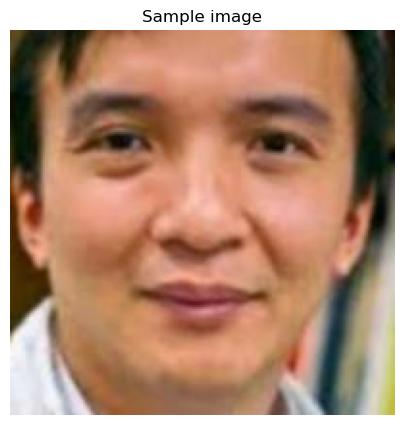

Total number of images  : 23708
Sample Image Path       : 40_0_2_20170112003844676.jpg
Sample Age              : 40
Sample Gender           : Male
Sample Ethnicity        : Asian



In [441]:
dir_path = "archive/utkface_aligned_cropped/UTKFace/"
image_paths = os.listdir(dir_path)

# tuples that have indicies corresponding to the labeled race or gender
gender = ("Male", "Female")
race = ("White", "Black", "Asian", "Indian", "Hispanic, Latino, or Middle Eastern")

random_image_path=np.random.choice(image_paths)
random_image = plt.imread(dir_path + random_image_path)/255 #255 for normalization
sample_age, sample_gender, sample_ethnicity, *_ = random_image_path.split("_")

plt.figure(figsize= (5,5))
plt.title("Sample image")
plt.imshow(random_image)
plt.axis("off")
plt.show()

print(f"Total number of images  : {len(image_paths)}")
print(f"Sample Image Path       : {random_image_path}")
print(f"Sample Age              : {sample_age}")
print(f"Sample Gender           : {gender[int(sample_gender)]}")
print(f"Sample Ethnicity        : {race[int(sample_ethnicity)]}\n")


In [442]:
#now to radomize the image paths
np.random.shuffle(image_paths)

# create training and validation sets
train_images, valid_images = train_test_split(
    image_paths,
    train_size = 0.9,
    test_size = 0.1
)

print(f"Training Size   : {len(train_images)}")
print(f"Validation Size : {len(valid_images)}")

train_ages = [int(path.split("_")[0]) for path in train_images]
validation_ages=[int(path.split("_")[0]) for path in valid_images]



Training Size   : 21337
Validation Size : 2371


In [ ]:
class AgeRegressionCNN(nn.Module):
    def __init__(self):
        super(AgeRegressionCNN, self).__init__()
        #three convolution planes one for each color?
        self.conv1 = nn.Conv2d(3,32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32,64, kernel_size=3, stride =1, padding =1)
        self.conv3 = nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1)
        
        self.pool= nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
        self.fc1 = nn.Linear(128*25*25, 512)
        self.fc2 = nn.Linear(512,1)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(x.size(0),1)
        x = F.relu(self.fc1(x))
        age = self.fc2(x)
        